# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [51]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [52]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [5]:
#function

In [6]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Larger range of scores for the GRE than for GPA. 

#### Question 4. Drop data points with missing data


In [29]:
df_raw[df_raw.isnull().any(axis=1)]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [83]:
df_raw.drop(df_raw.index[187], inplace=True)
df_raw.drop(df_raw.index[212], inplace=True)
df_raw.drop(df_raw.index[236], inplace=True)

In [82]:
df_raw[df_raw.isnull().any(axis=1)]

,admit,gre,gpa,prestige


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: When pulling up the missing data agin after dropping the rows with missing information, we can see that the count has disappeared.

#### Question 6. Create box plots for GRE and GPA

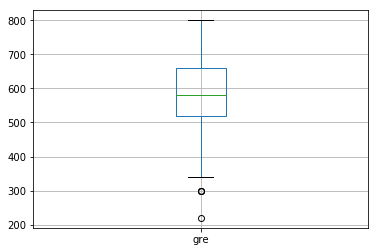

In [8]:
#boxplot 1
df_raw.boxplot("gre")

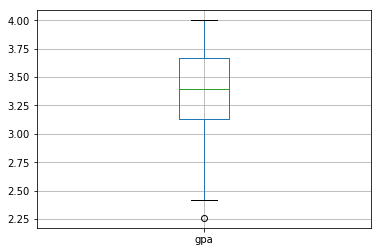

In [9]:
#boxplot 2 
df_raw.boxplot("gpa")

#### Question 7. What do this plots show?

Answer: These plots show the range of data for both GRE scores and GPA. However, and importantly, they also show outliers in the data, far below the expected minimums.

#### Question 8. Describe each distribution 

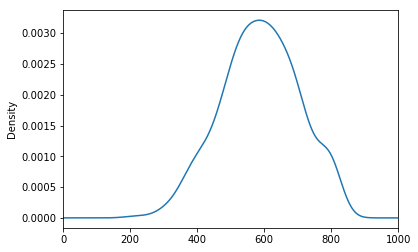

In [16]:
# plot the distribution of each variable 
df_raw["gre"].plot(kind='density', xlim=(0, 1000))


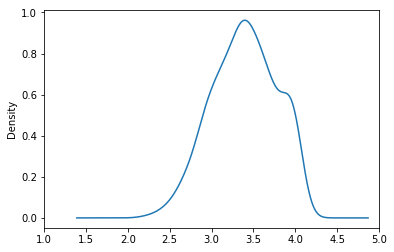

In [30]:
df_raw["gpa"].plot(kind='density', xlim=(1, 5))

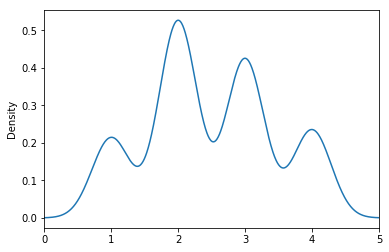

In [34]:
df_raw["prestige"].plot(kind='density', xlim=(-0, 5))

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. The data for GRE and GPA are slightly skewed towards the higher end of the distribution. This is because only those applicants with higher scores will be considered for admission. Chances are, those who receive lower GPAs (<2.5) will probably not apply to graduate school.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: The correction is needed in the prestige variable, which must be adjusted with dummy variables to prestiges 1-4. This will help us explore direct correlations between each prestige of school and the admission rate correlated with each level.

#### Question 11. Which of our variables are potentially colinear? 

In [35]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: GRE and GPA are very closely correlated when it comes to their effect on admittance.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: One thing we can do when exploring the link between admit rates and school prestige is use dummy variables to further break down the category of school prestige. This will help us understand school prestige a bit better and the overall effect on admittance. Using dummy variables, we are able to split prestige into variables on a 1-4 scale. We can then run a simple regression and see which fit is most relevant when it comes to which prestige of school is correlated with admission. 

#### Question 14. What is your hypothesis? 

Answer: My hypothesis is that schools of a higher prestige (i.e., 1 and 2) will be correlated with higher admission statistics than schools of a lower prestige (3 and 4). 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data